In [1]:
import numpy as np
import sympy
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [2]:
df_Ag = pd.read_csv('Ag.csv')

In [3]:
def model_SAD(I,t,k,A,alpha,beta):
    Na,Ns,Nd = I
    dNa = beta*Ns+k*(1-Na/(A-Nd-Ns))*Na
    dNs = -alpha*Ns-beta*Ns
    dNd = alpha*Ns
    return np.array([dNa,dNs,dNd])
def fit_model_SAD(t,k,A,alpha,beta):
    return odeint(model_SAD,(Na0,Ns0,Nd0),t,args=(k,A,alpha,beta))
def fit_od(t,k,A,alpha,beta):
    return np.sum(fit_model_SAD(t,k,A,alpha,beta),axis=1)
def fit_CFU(t,k,A,alpha,beta):
    return np.sum(fit_model_SAD(t,r,K,alpha,beta)[:,0:2],axis=1)
def Gompertz(t, A, lamta, Um):
    return A*np.exp(-np.exp(Um*np.exp(1)*(lamta-t)/A + 1))

In [4]:
def R_squared(Y,Y_fitted):
    mean = np.mean(Y)
    ss_tot = np.sum((Y - mean) ** 2)
    ss_res = np.sum((Y - Y_fitted) ** 2)
    r_squared = 1 - (ss_res / ss_tot) 
    return np.round(r_squared,3)

/Users/alice/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([0.88835447, 1.71411356, 0.11242435])

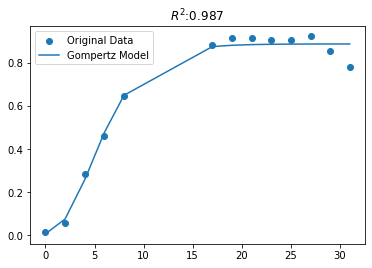

In [5]:
# Gompertz, find lamta, Um at different Ag ion concentrations
df_Ag_con = df_Ag[df_Ag['treat'] == 0]
time_Ag = df_Ag_con['time']
A = 1.0
popt,pcov = optimize.curve_fit(Gompertz,time_Ag,df_Ag_con['od'],p0=(1.0,1.2,2.))
fitted_Gompertz = Gompertz(time_Ag,*popt)
plt.scatter(time_Ag,df_Ag_con['od'],label = 'Original Data')
plt.plot(time_Ag,fitted_Gompertz,label = 'Gompertz Model')
plt.legend()
plt.title('$R^2$:'+str(R_squared(df_Ag_con['od'],fitted_Gompertz)))
popt

/Users/alice/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([0.89169114, 2.42675659, 0.11570639])

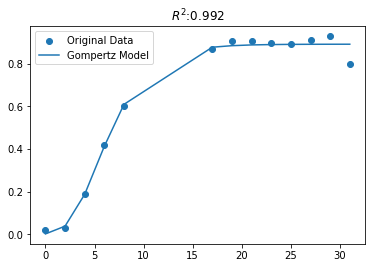

In [6]:
df_Ag_con = df_Ag[df_Ag['treat'] == 5]
time_Ag = df_Ag_con['time']
A = 1.0
popt,pcov = optimize.curve_fit(Gompertz,time_Ag,df_Ag_con['od'],p0=(1.0,1.2,2.))
fitted_Gompertz = Gompertz(time_Ag,*popt)
plt.scatter(time_Ag,df_Ag_con['od'],label = 'Original Data')
plt.plot(time_Ag,fitted_Gompertz,label = 'Gompertz Model')
plt.legend()
plt.title('$R^2$:'+str(R_squared(df_Ag_con['od'],fitted_Gompertz)))
popt

/Users/alice/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([0.90429846, 3.15486006, 0.11563515])

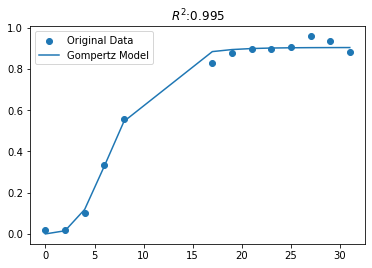

In [7]:
df_Ag_con = df_Ag[df_Ag['treat'] == 10]
time_Ag = df_Ag_con['time']
A = 1.0
popt,pcov = optimize.curve_fit(Gompertz,time_Ag,df_Ag_con['od'],p0=(1.0,1.2,2.))
fitted_Gompertz = Gompertz(time_Ag,*popt)
plt.scatter(time_Ag,df_Ag_con['od'],label = 'Original Data')
plt.plot(time_Ag,fitted_Gompertz,label = 'Gompertz Model')
plt.legend()
plt.title('$R^2$:'+str(R_squared(df_Ag_con['od'],fitted_Gompertz)))
popt

/Users/alice/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([0.87110523, 4.45995865, 0.13139633])

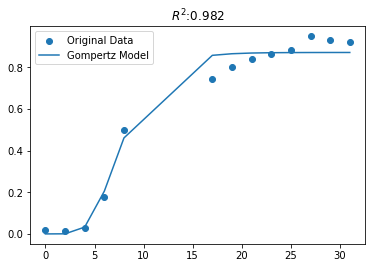

In [8]:
df_Ag_con = df_Ag[df_Ag['treat'] == 20]
time_Ag = df_Ag_con['time']
A = 1.0
popt,pcov = optimize.curve_fit(Gompertz,time_Ag,df_Ag_con['od'],p0=(1.0,1.2,2.))
fitted_Gompertz = Gompertz(time_Ag,*popt)
plt.scatter(time_Ag,df_Ag_con['od'],label = 'Original Data')
plt.plot(time_Ag,fitted_Gompertz,label = 'Gompertz Model')
plt.legend()
plt.title('$R^2$:'+str(R_squared(df_Ag_con['od'],fitted_Gompertz)))
popt

/Users/alice/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([1.0991356 , 7.62541762, 0.05016174])

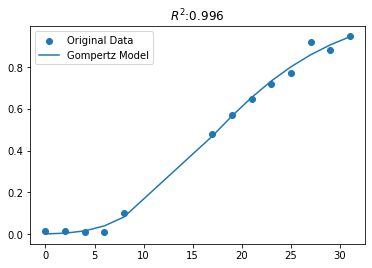

In [9]:
df_Ag_con = df_Ag[df_Ag['treat'] == 40]
time_Ag = df_Ag_con['time']
A = 1.0
popt,pcov = optimize.curve_fit(Gompertz,time_Ag,df_Ag_con['od'],p0=(1.0,1.2,2.))
fitted_Gompertz = Gompertz(time_Ag,*popt)
plt.scatter(time_Ag,df_Ag_con['od'],label = 'Original Data')
plt.plot(time_Ag,fitted_Gompertz,label = 'Gompertz Model')
plt.legend()
plt.title('$R^2$:'+str(R_squared(df_Ag_con['od'],fitted_Gompertz)))
popt